In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras

In [4]:
np.random.seed(10)
modelfile = './model.new'  # 神经网络权重保存


In [5]:
def getData():
    df = pd.read_csv('./Dmax3.csv')
    x = df[['Tg', 'Tx', 'Tl']]
    y = df[['Dmax']]
    x_scaler = MinMaxScaler(feature_range=(-1, 1))
    y_scaler = MinMaxScaler(feature_range=(-1, 1))
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)  # 切分数据集
    samplein = x_train.T
    sampleout = y_train.T
    return x_train, x_test, y_train, y_test, samplein, sampleout, x_scaler, y_scaler


In [6]:
# 获取数据
x_train, x_test, y_train, y_test, samplein, sampleout, x_scaler, y_scaler = getData()

# 构建网络
model = Sequential()  # 层次模型
model.add(Dense(20, input_dim=3, kernel_initializer='uniform'))  # 输入层，Dense表示BP层
model.add(Activation('relu'))
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dense(1))  # 输出层

In [7]:
# 设置优化器
optimizers = keras.optimizers.adam_v2.Adam(lr=0.001)  # lr=0.001左右的可以，影响不大
model.compile(loss='mse', optimizer=optimizers)
model.summary()
historydata = model.fit(x_train, y_train, epochs=1000, batch_size=128, verbose=2, validation_split=0.2)  # 训练模型1000次
model.evaluate(x_test, y_test)  # 模型测试
model.save(modelfile, overwrite=True)  # 保存模型权重


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 activation (Activation)     (None, 20)                0         


D:\Anaconda3\envs\pytorch\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                 
 dense_1 (Dense)             (None, 25)                525       
                                                                 
 activation_1 (Activation)   (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 activation_3 (Activation)   (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                320       
                                                                 
 activatio

Epoch 83/1000
4/4 - 0s - loss: 0.0725 - val_loss: 0.0683 - 252ms/epoch - 63ms/step
Epoch 84/1000
4/4 - 0s - loss: 0.0723 - val_loss: 0.0683 - 326ms/epoch - 81ms/step
Epoch 85/1000
4/4 - 0s - loss: 0.0718 - val_loss: 0.0681 - 324ms/epoch - 81ms/step
Epoch 86/1000
4/4 - 0s - loss: 0.0714 - val_loss: 0.0678 - 289ms/epoch - 72ms/step
Epoch 87/1000
4/4 - 0s - loss: 0.0710 - val_loss: 0.0674 - 286ms/epoch - 71ms/step
Epoch 88/1000
4/4 - 0s - loss: 0.0707 - val_loss: 0.0671 - 280ms/epoch - 70ms/step
Epoch 89/1000
4/4 - 0s - loss: 0.0703 - val_loss: 0.0671 - 314ms/epoch - 78ms/step
Epoch 90/1000
4/4 - 0s - loss: 0.0701 - val_loss: 0.0672 - 305ms/epoch - 76ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.0697 - val_loss: 0.0672 - 267ms/epoch - 67ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.0693 - val_loss: 0.0670 - 316ms/epoch - 79ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.0689 - val_loss: 0.0665 - 309ms/epoch - 77ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.0685 - val_loss: 0.0657 - 306ms/epoch - 76ms/step
Epoc

4/4 - 0s - loss: 0.0499 - val_loss: 0.0588 - 281ms/epoch - 70ms/step
Epoch 182/1000
4/4 - 0s - loss: 0.0493 - val_loss: 0.0581 - 296ms/epoch - 74ms/step
Epoch 183/1000
4/4 - 0s - loss: 0.0492 - val_loss: 0.0570 - 326ms/epoch - 81ms/step
Epoch 184/1000
4/4 - 0s - loss: 0.0490 - val_loss: 0.0564 - 328ms/epoch - 82ms/step
Epoch 185/1000
4/4 - 0s - loss: 0.0489 - val_loss: 0.0559 - 318ms/epoch - 79ms/step
Epoch 186/1000
4/4 - 0s - loss: 0.0491 - val_loss: 0.0561 - 302ms/epoch - 75ms/step
Epoch 187/1000
4/4 - 0s - loss: 0.0490 - val_loss: 0.0561 - 314ms/epoch - 78ms/step
Epoch 188/1000
4/4 - 0s - loss: 0.0491 - val_loss: 0.0554 - 337ms/epoch - 84ms/step
Epoch 189/1000
4/4 - 0s - loss: 0.0490 - val_loss: 0.0555 - 288ms/epoch - 72ms/step
Epoch 190/1000
4/4 - 0s - loss: 0.0489 - val_loss: 0.0563 - 343ms/epoch - 86ms/step
Epoch 191/1000
4/4 - 0s - loss: 0.0486 - val_loss: 0.0558 - 307ms/epoch - 77ms/step
Epoch 192/1000
4/4 - 0s - loss: 0.0487 - val_loss: 0.0556 - 317ms/epoch - 79ms/step
Epoch 1

4/4 - 0s - loss: 0.0426 - val_loss: 0.0533 - 274ms/epoch - 68ms/step
Epoch 280/1000
4/4 - 0s - loss: 0.0444 - val_loss: 0.0542 - 268ms/epoch - 67ms/step
Epoch 281/1000
4/4 - 0s - loss: 0.0453 - val_loss: 0.0522 - 277ms/epoch - 69ms/step
Epoch 282/1000
4/4 - 0s - loss: 0.0434 - val_loss: 0.0524 - 354ms/epoch - 89ms/step
Epoch 283/1000
4/4 - 0s - loss: 0.0431 - val_loss: 0.0531 - 276ms/epoch - 69ms/step
Epoch 284/1000
4/4 - 0s - loss: 0.0424 - val_loss: 0.0541 - 309ms/epoch - 77ms/step
Epoch 285/1000
4/4 - 0s - loss: 0.0426 - val_loss: 0.0541 - 295ms/epoch - 74ms/step
Epoch 286/1000
4/4 - 0s - loss: 0.0430 - val_loss: 0.0529 - 302ms/epoch - 76ms/step
Epoch 287/1000
4/4 - 0s - loss: 0.0433 - val_loss: 0.0519 - 342ms/epoch - 85ms/step
Epoch 288/1000
4/4 - 0s - loss: 0.0428 - val_loss: 0.0526 - 347ms/epoch - 87ms/step
Epoch 289/1000
4/4 - 0s - loss: 0.0424 - val_loss: 0.0563 - 314ms/epoch - 79ms/step
Epoch 290/1000
4/4 - 0s - loss: 0.0440 - val_loss: 0.0564 - 290ms/epoch - 72ms/step
Epoch 2

Epoch 378/1000
4/4 - 0s - loss: 0.0411 - val_loss: 0.0528 - 326ms/epoch - 81ms/step
Epoch 379/1000
4/4 - 0s - loss: 0.0409 - val_loss: 0.0530 - 277ms/epoch - 69ms/step
Epoch 380/1000
4/4 - 0s - loss: 0.0406 - val_loss: 0.0525 - 281ms/epoch - 70ms/step
Epoch 381/1000
4/4 - 0s - loss: 0.0410 - val_loss: 0.0530 - 278ms/epoch - 69ms/step
Epoch 382/1000
4/4 - 0s - loss: 0.0412 - val_loss: 0.0524 - 288ms/epoch - 72ms/step
Epoch 383/1000
4/4 - 0s - loss: 0.0404 - val_loss: 0.0517 - 280ms/epoch - 70ms/step
Epoch 384/1000
4/4 - 0s - loss: 0.0402 - val_loss: 0.0507 - 305ms/epoch - 76ms/step
Epoch 385/1000
4/4 - 0s - loss: 0.0417 - val_loss: 0.0504 - 319ms/epoch - 80ms/step
Epoch 386/1000
4/4 - 0s - loss: 0.0409 - val_loss: 0.0513 - 263ms/epoch - 66ms/step
Epoch 387/1000
4/4 - 0s - loss: 0.0404 - val_loss: 0.0519 - 315ms/epoch - 79ms/step
Epoch 388/1000
4/4 - 0s - loss: 0.0403 - val_loss: 0.0518 - 324ms/epoch - 81ms/step
Epoch 389/1000
4/4 - 0s - loss: 0.0402 - val_loss: 0.0513 - 283ms/epoch - 71

4/4 - 0s - loss: 0.0391 - val_loss: 0.0496 - 450ms/epoch - 113ms/step
Epoch 477/1000
4/4 - 0s - loss: 0.0398 - val_loss: 0.0502 - 452ms/epoch - 113ms/step
Epoch 478/1000
4/4 - 0s - loss: 0.0401 - val_loss: 0.0549 - 453ms/epoch - 113ms/step
Epoch 479/1000
4/4 - 0s - loss: 0.0431 - val_loss: 0.0608 - 445ms/epoch - 111ms/step
Epoch 480/1000
4/4 - 0s - loss: 0.0448 - val_loss: 0.0538 - 458ms/epoch - 114ms/step
Epoch 481/1000
4/4 - 0s - loss: 0.0441 - val_loss: 0.0512 - 333ms/epoch - 83ms/step
Epoch 482/1000
4/4 - 0s - loss: 0.0409 - val_loss: 0.0493 - 301ms/epoch - 75ms/step
Epoch 483/1000
4/4 - 0s - loss: 0.0394 - val_loss: 0.0510 - 299ms/epoch - 75ms/step
Epoch 484/1000
4/4 - 0s - loss: 0.0401 - val_loss: 0.0517 - 303ms/epoch - 76ms/step
Epoch 485/1000
4/4 - 0s - loss: 0.0404 - val_loss: 0.0508 - 301ms/epoch - 75ms/step
Epoch 486/1000
4/4 - 0s - loss: 0.0397 - val_loss: 0.0499 - 299ms/epoch - 75ms/step
Epoch 487/1000
4/4 - 0s - loss: 0.0403 - val_loss: 0.0508 - 379ms/epoch - 95ms/step
Ep

4/4 - 0s - loss: 0.0386 - val_loss: 0.0494 - 449ms/epoch - 112ms/step
Epoch 575/1000
4/4 - 0s - loss: 0.0394 - val_loss: 0.0492 - 453ms/epoch - 113ms/step
Epoch 576/1000
4/4 - 0s - loss: 0.0395 - val_loss: 0.0486 - 387ms/epoch - 97ms/step
Epoch 577/1000
4/4 - 0s - loss: 0.0388 - val_loss: 0.0493 - 96ms/epoch - 24ms/step
Epoch 578/1000
4/4 - 0s - loss: 0.0387 - val_loss: 0.0500 - 69ms/epoch - 17ms/step
Epoch 579/1000
4/4 - 0s - loss: 0.0389 - val_loss: 0.0526 - 59ms/epoch - 15ms/step
Epoch 580/1000
4/4 - 0s - loss: 0.0399 - val_loss: 0.0535 - 58ms/epoch - 14ms/step
Epoch 581/1000
4/4 - 0s - loss: 0.0397 - val_loss: 0.0525 - 58ms/epoch - 14ms/step
Epoch 582/1000
4/4 - 0s - loss: 0.0389 - val_loss: 0.0505 - 55ms/epoch - 14ms/step
Epoch 583/1000
4/4 - 0s - loss: 0.0383 - val_loss: 0.0488 - 52ms/epoch - 13ms/step
Epoch 584/1000
4/4 - 0s - loss: 0.0395 - val_loss: 0.0493 - 51ms/epoch - 13ms/step
Epoch 585/1000
4/4 - 0s - loss: 0.0403 - val_loss: 0.0495 - 51ms/epoch - 13ms/step
Epoch 586/1000

Epoch 672/1000
4/4 - 0s - loss: 0.0379 - val_loss: 0.0496 - 59ms/epoch - 15ms/step
Epoch 673/1000
4/4 - 0s - loss: 0.0378 - val_loss: 0.0496 - 57ms/epoch - 14ms/step
Epoch 674/1000
4/4 - 0s - loss: 0.0391 - val_loss: 0.0516 - 58ms/epoch - 14ms/step
Epoch 675/1000
4/4 - 0s - loss: 0.0387 - val_loss: 0.0475 - 58ms/epoch - 14ms/step
Epoch 676/1000
4/4 - 0s - loss: 0.0380 - val_loss: 0.0491 - 58ms/epoch - 14ms/step
Epoch 677/1000
4/4 - 0s - loss: 0.0409 - val_loss: 0.0498 - 59ms/epoch - 15ms/step
Epoch 678/1000
4/4 - 0s - loss: 0.0407 - val_loss: 0.0485 - 58ms/epoch - 14ms/step
Epoch 679/1000
4/4 - 0s - loss: 0.0387 - val_loss: 0.0472 - 57ms/epoch - 14ms/step
Epoch 680/1000
4/4 - 0s - loss: 0.0390 - val_loss: 0.0481 - 57ms/epoch - 14ms/step
Epoch 681/1000
4/4 - 0s - loss: 0.0382 - val_loss: 0.0502 - 57ms/epoch - 14ms/step
Epoch 682/1000
4/4 - 0s - loss: 0.0382 - val_loss: 0.0510 - 57ms/epoch - 14ms/step
Epoch 683/1000
4/4 - 0s - loss: 0.0386 - val_loss: 0.0502 - 59ms/epoch - 15ms/step
Epoc

Epoch 771/1000
4/4 - 0s - loss: 0.0374 - val_loss: 0.0499 - 347ms/epoch - 87ms/step
Epoch 772/1000
4/4 - 0s - loss: 0.0378 - val_loss: 0.0494 - 191ms/epoch - 48ms/step
Epoch 773/1000
4/4 - 0s - loss: 0.0368 - val_loss: 0.0501 - 186ms/epoch - 47ms/step
Epoch 774/1000
4/4 - 0s - loss: 0.0367 - val_loss: 0.0493 - 174ms/epoch - 44ms/step
Epoch 775/1000
4/4 - 0s - loss: 0.0365 - val_loss: 0.0485 - 200ms/epoch - 50ms/step
Epoch 776/1000
4/4 - 0s - loss: 0.0368 - val_loss: 0.0491 - 194ms/epoch - 49ms/step
Epoch 777/1000
4/4 - 0s - loss: 0.0372 - val_loss: 0.0491 - 198ms/epoch - 50ms/step
Epoch 778/1000
4/4 - 0s - loss: 0.0365 - val_loss: 0.0498 - 188ms/epoch - 47ms/step
Epoch 779/1000
4/4 - 0s - loss: 0.0368 - val_loss: 0.0505 - 180ms/epoch - 45ms/step
Epoch 780/1000
4/4 - 0s - loss: 0.0370 - val_loss: 0.0490 - 184ms/epoch - 46ms/step
Epoch 781/1000
4/4 - 0s - loss: 0.0369 - val_loss: 0.0486 - 179ms/epoch - 45ms/step
Epoch 782/1000
4/4 - 0s - loss: 0.0368 - val_loss: 0.0512 - 180ms/epoch - 45

4/4 - 0s - loss: 0.0365 - val_loss: 0.0477 - 51ms/epoch - 13ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0357 - val_loss: 0.0484 - 56ms/epoch - 14ms/step
Epoch 871/1000
4/4 - 0s - loss: 0.0359 - val_loss: 0.0507 - 57ms/epoch - 14ms/step
Epoch 872/1000
4/4 - 0s - loss: 0.0363 - val_loss: 0.0494 - 55ms/epoch - 14ms/step
Epoch 873/1000
4/4 - 0s - loss: 0.0355 - val_loss: 0.0481 - 55ms/epoch - 14ms/step
Epoch 874/1000
4/4 - 0s - loss: 0.0367 - val_loss: 0.0486 - 52ms/epoch - 13ms/step
Epoch 875/1000
4/4 - 0s - loss: 0.0372 - val_loss: 0.0492 - 52ms/epoch - 13ms/step
Epoch 876/1000
4/4 - 0s - loss: 0.0363 - val_loss: 0.0488 - 57ms/epoch - 14ms/step
Epoch 877/1000
4/4 - 0s - loss: 0.0373 - val_loss: 0.0486 - 50ms/epoch - 12ms/step
Epoch 878/1000
4/4 - 0s - loss: 0.0367 - val_loss: 0.0493 - 52ms/epoch - 13ms/step
Epoch 879/1000
4/4 - 0s - loss: 0.0356 - val_loss: 0.0486 - 280ms/epoch - 70ms/step
Epoch 880/1000
4/4 - 0s - loss: 0.0353 - val_loss: 0.0510 - 214ms/epoch - 54ms/step
Epoch 881/1000
4/

Epoch 967/1000
4/4 - 0s - loss: 0.0359 - val_loss: 0.0483 - 70ms/epoch - 17ms/step
Epoch 968/1000
4/4 - 0s - loss: 0.0361 - val_loss: 0.0480 - 88ms/epoch - 22ms/step
Epoch 969/1000
4/4 - 0s - loss: 0.0353 - val_loss: 0.0485 - 51ms/epoch - 13ms/step
Epoch 970/1000
4/4 - 0s - loss: 0.0358 - val_loss: 0.0507 - 54ms/epoch - 13ms/step
Epoch 971/1000
4/4 - 0s - loss: 0.0364 - val_loss: 0.0535 - 56ms/epoch - 14ms/step
Epoch 972/1000
4/4 - 0s - loss: 0.0369 - val_loss: 0.0495 - 56ms/epoch - 14ms/step
Epoch 973/1000
4/4 - 0s - loss: 0.0351 - val_loss: 0.0472 - 57ms/epoch - 14ms/step
Epoch 974/1000
4/4 - 0s - loss: 0.0358 - val_loss: 0.0463 - 58ms/epoch - 14ms/step
Epoch 975/1000
4/4 - 0s - loss: 0.0351 - val_loss: 0.0473 - 53ms/epoch - 13ms/step
Epoch 976/1000
4/4 - 0s - loss: 0.0347 - val_loss: 0.0491 - 46ms/epoch - 11ms/step
Epoch 977/1000
4/4 - 0s - loss: 0.0357 - val_loss: 0.0491 - 45ms/epoch - 11ms/step
Epoch 978/1000
4/4 - 0s - loss: 0.0354 - val_loss: 0.0477 - 51ms/epoch - 13ms/step
Epoc

In [38]:
# data = model.predict(x_test)
# ypre = y_scaler.inverse_transform(data)   # 逆采样，将转标准化后的数据转化为原始数据
# ytest = y_scaler.inverse_transform(y_test)

# ytpre = model.predict(x_train)
# ytpre = y_scaler.inverse_transform(ytpre)
# ytrain = y_scaler.inverse_transform(y_train)

data = model.predict(x_test)
ypre = np.exp(data)   # 逆采样，将转标准化后的数据转化为原始数据
ytest = np.exp(y_test)

ytpre = model.predict(x_train)
ytpre = np.exp(ytpre)
ytrain = np.exp(y_train)

15/15 [==============================] - 0s 4ms/step


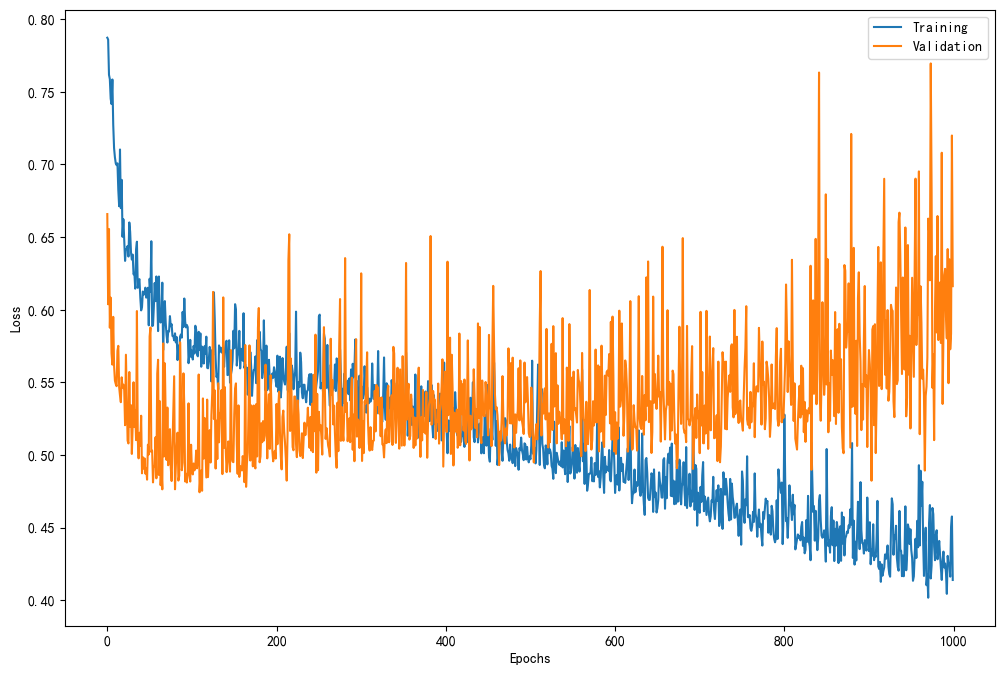

In [40]:

plt.figure(1,figsize=(12,8))
plt.plot(historydata.history['loss'])
plt.plot(historydata.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

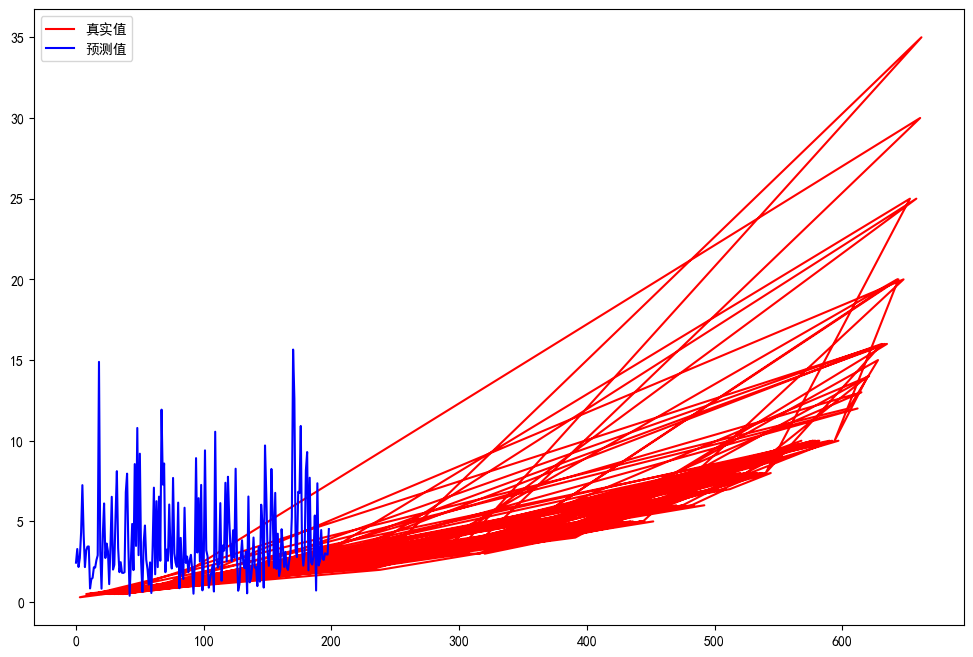

In [41]:
plt.figure(figsize=(12,8))
plt.plot(ytest, color="r", label="真实值")
plt.plot(ypre, color="blue", label="预测值")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 字符显示
plt.legend()
plt.show()
print("\n")

In [42]:
def getValu(x, y):
    value1 = []
    value2 = []
    for i in range(len(x)):
        k1 = x[i][0]
        k2 = y[i][0]
        value1.append(k1)
        value2.append(k2)
    return value1, value2

def numbch(data):
    value = []
    for i in range(len(data)):
        value.append(str(data[i]))
    return value


def getCorre(x, y):
    result = 0
    result1 = 0
    result2 = 0
    value = 0
    xaver = np.sum(x) / len(x)
    yaver = np.sum(y) / len(y)
    for i in range(len(x)):
        k = (x[i] - xaver) * (y[i] - yaver)
        k1 = (x[i] - xaver) * (x[i] - xaver)
        k2 = (y[i] - yaver) * (y[i] - yaver)
        result = result + k
        result1 = result1 + k1
        result2 = result2 + k2
    mol = result
    xden = np.sqrt(result1)
    yden = np.sqrt(result2)
    value = mol / (xden * yden)
    return value


In [43]:
ytest, ypre = getValu(ytest, ypre)
ytrain, ytpre = getValu(ytrain, ytpre)
value1 = getCorre(ytest, ypre)
value2 = getCorre(ytrain, ytpre)
print(value1, value2)

KeyError: 0

In [18]:
def dimension_transformation(data):
    for element in data:
        for value in element:
            yield value


def numbers_convert_characters(data):
    value = []
    for i in range(len(data)):
        value.append(str(data[i]))
    return value

In [19]:
ytest = numbers_convert_characters(ytest)
ypre = numbers_convert_characters(ypre)
ytrain = numbers_convert_characters(ytrain)
ytpre = numbers_convert_characters(ytpre)

In [20]:
f = open('./test.txt', 'w')
for i in range(len(ytest)):
    f.writelines(ytest[i])
    f.writelines(" ")
    f.writelines(ypre[i])
    f.writelines('\n')
f.close()

In [21]:
f1 = open('./train.txt', 'w')
for j in range(len(ytrain)):
    f1.writelines(ytrain[j])
    f1.writelines(" ")
    f1.writelines(ytpre[j])
    f1.writelines('\n')
f1.close()

In [52]:
data = model.predict(x_test)
ypre = np.exp(data)   # 逆采样，将转标准化后的数据转化为原始数据
ytest = np.exp(y_test)

ytpre = model.predict(x_train)
ytpre = np.exp(ytpre)
ytrain = np.exp(y_train)

15/15 [==============================] - 0s 2ms/step


In [54]:
pd.DataFrame(ypre)
pd.DataFrame(y_test)
print(ypre)
# print(y_test)

[[ 2.8122845 ]
 [ 6.7999988 ]
 [ 2.588252  ]
 [ 2.0711458 ]
 [ 5.4712515 ]
 [ 7.463753  ]
 [ 3.4964554 ]
 [ 2.450288  ]
 [ 4.161105  ]
 [ 4.165334  ]
 [ 4.573706  ]
 [ 0.9305696 ]
 [ 0.581496  ]
 [ 2.4283218 ]
 [ 2.4652796 ]
 [ 2.4251037 ]
 [ 2.9854503 ]
 [ 1.817793  ]
 [18.83222   ]
 [ 3.869274  ]
 [ 0.8942317 ]
 [ 3.7402687 ]
 [ 4.053019  ]
 [ 3.1137996 ]
 [ 4.2161417 ]
 [ 3.7775693 ]
 [ 2.830032  ]
 [ 4.049336  ]
 [ 6.1354923 ]
 [ 1.8623554 ]
 [ 2.5258064 ]
 [ 5.5720553 ]
 [ 9.17819   ]
 [ 3.0293777 ]
 [ 1.4942977 ]
 [ 2.4461935 ]
 [ 2.3363755 ]
 [ 1.3463327 ]
 [ 2.4910233 ]
 [ 6.90523   ]
 [10.163437  ]
 [ 3.9019465 ]
 [ 0.1572488 ]
 [ 3.0825799 ]
 [ 4.8021874 ]
 [ 2.202665  ]
 [10.447506  ]
 [ 4.402249  ]
 [16.552864  ]
 [ 3.2243156 ]
 [ 7.818493  ]
 [ 2.8415368 ]
 [ 0.6603973 ]
 [ 4.4086933 ]
 [ 5.5338697 ]
 [ 2.627239  ]
 [ 1.7407119 ]
 [ 1.2632484 ]
 [ 2.780755  ]
 [ 0.7031771 ]
 [ 3.8814108 ]
 [ 8.893719  ]
 [ 3.7596445 ]
 [ 6.6816816 ]
 [ 2.5180595 ]
 [ 8.364806  ]
 [ 2.33245

In [53]:
type(ypre)

numpy.ndarray